# Spotify Song Genre Prediction
W207

Group Members: Ivan Escalona, Daisy Khamphakdy, Iris Lew, Shuo Wang, Amanda Teschko

Objective (problem statement): We are using machine learning to  classify song genres using its features so that Spotify can automatically classify songs as soon as they're uploaded.

Dataset: https://www.kaggle.com/datasets/mrmorj/dataset-of-songs-in-spotify

Model: KNN, KMeans, Logistic Regression, Random Forest, Gradient Boosted Trees

---


**Features Definitions:**
*   **Danceability** - how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
*   **Energy** - a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.
*   **Key** - estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
*   **Loudness** - overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
*   **Mode** - the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
*   **Speechiness** - detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music.Values below 0.33 most likely represent music and other non-speech-like tracks.
*   **Acousticness** - a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
*   **Instrumentalness** - detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. (THIS MIGHT BE A PREDICTION AND ALGORITHM FROM SPOTIFY**)
*   **Liveness** - detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
*   Time_signature - An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
*   **Duration_ms** - The duration of the track in milliseconds.
*   **Valence** - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
*   Tempo - the overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**References:**
1.   https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features
2. https://www.kaggle.com/code/pelinsoylu/spotify-popularity-prediction-ml-practice

---







In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.datasets import make_blobs


## Load Data

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

raw_df = pd.read_csv('/content/gdrive/My Drive/W207 Final Project/genres_v2.csv')


Mounted at /content/gdrive


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# raw_df = pd.read_csv('genres_v2.csv')

## Exploratory Data Analysis - To Be Added

In [4]:
raw_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


## Data Pre-processing
    1. Drop unnecessary columns
    2. Remove duplicates
    3. Correct records with multiple genres by randomly sampling one record






In [5]:
#drop unnecessary columns
df = raw_df.drop(['Unnamed: 0','title', 'song_name', 'analysis_url', 'track_href', 'uri','type'], axis=1)

#remove duplicate records
df = df.drop_duplicates()

#get records with duplicate genres
dup_genres = df[df.groupby(df['id'])['genre'].transform('count')!=1]
non_dup_genres = df[df.groupby(df['id'])['genre'].transform('count')==1]

print(non_dup_genres['id'].nunique(), "ids were mapped to multiple genres in raw data")
print("Sampling one genre from those who have multiple...")

#randomly sample one record to select genre
dup_genres_clean = dup_genres.groupby('id').sample(n=1, random_state = 0)

df = pd.concat([dup_genres_clean, non_dup_genres])

print(df[df.groupby(df['id'])['genre'].transform('count')!=1]['id'].nunique(), "ids are mapped to multiple genres after random sampling")

df

33357 ids were mapped to multiple genres in raw data
Sampling one genre from those who have multiple...
0 ids are mapped to multiple genres after random sampling


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,genre
11399,0.853,0.726,3,-7.414,0,0.0728,0.362000,0.000329,0.1100,0.8210,136.073,00RaykzZO1vFk3eSSxHYHV,140251,4,Trap Metal
1362,0.583,0.915,4,-2.191,1,0.4640,0.093600,0.000000,0.3480,0.6280,179.836,00bEP3V5Ova0ihFnLUFbK2,138757,4,Dark Trap
14796,0.899,0.509,9,-8.040,1,0.3870,0.001570,0.000000,0.0573,0.5990,150.001,00ko9WaS4jOX1kEk3gvHjf,225924,4,Rap
338,0.756,0.453,8,-9.965,1,0.3180,0.003900,0.000000,0.6320,0.1140,140.132,00p85inzGeXRXgqDVn7Ftq,144380,4,Dark Trap
22939,0.814,0.952,8,-7.037,0,0.0655,0.005150,0.915000,0.0383,0.6870,125.005,00povvAoXqjwRmQeO4NrCu,403054,4,techhouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42298,0.502,0.991,5,-4.333,0,0.2400,0.005540,0.000198,0.4700,0.0797,150.029,4PMqy2vJjmv6ydGVqtCqPW,200000,4,hardstyle
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,46bXU7Sgj7104ZoXxzz9tM,269208,4,hardstyle
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,72DAt9Lbpy9EUS29OzQLob,234823,4,hardstyle
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,6HXgExFVuE1c3cq9QjFCcU,323200,4,hardstyle


In [6]:
df.genre.value_counts()

Underground Rap    4801
Dark Trap          4018
trance             2802
psytrance          2650
Hiphop             2648
techno             2639
dnb                2505
trap               2359
hardstyle          2351
techhouse          2217
RnB                1899
Emo                1652
Trap Metal         1491
Rap                1424
Pop                 421
Name: genre, dtype: int64

## Train Test Split
    Create Train/Test Dataframes
    
    Dataframes:
        1. Train Unbalanced (df_train)
        2. Test Unbalanced (df_test)

In [7]:
train_size, test_size = .8, .2

#Train/Test 
df_train, df_test = train_test_split(df, train_size = train_size, random_state=0)


print('---------Unbalanced Record Count--------')
print("df_train:", len(df_train))
print("df_test:", len(df_test))


---------Unbalanced Record Count--------
df_train: 28701
df_test: 7176


In [8]:
print("Number of training id's in the test data frame (should be 0): ", len(df_train[df_train.id.isin(df_test.id)]))

Number of training id's in the test data frame (should be 0):  0


## Balancing
    Create balanced dataframe using undersampling method.  In the Undersampling method, we will set the sample size equal to 80% of the smallest genre's record count. We will randomly sample that sample size of records from each genre.    
     
     Dataframes:
         - 1, 2. Unbalanced Train, Test (df_test, df_train)
         - 2, 3. Balanced Using Undersampling Train, Test (df_bal_us_train)


##### Balancing by Undersampling

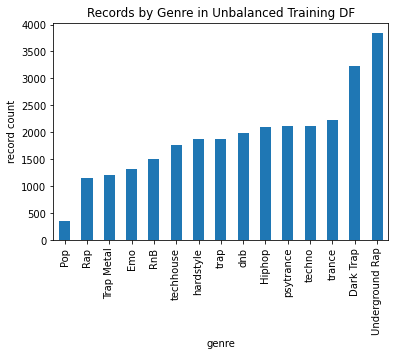

In [9]:
#show record counts for unbalanced 
df_train.groupby('genre')['id'].count().sort_values().plot.bar(ylabel='record count', title='Records by Genre in Unbalanced Training DF')

Sampling 285 records from each genre...



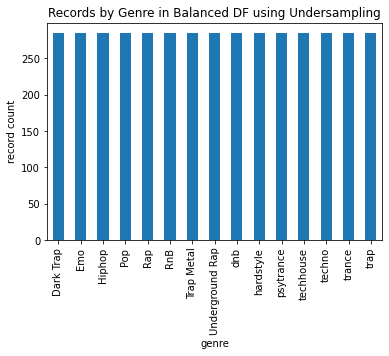

In [10]:
#find genre with smallest sample size
smallest_genre_size = df_train.groupby('genre')['id'].count().min()

#set sample size to be 80% of smallest genre
sample_size = round(.8*smallest_genre_size)

#sample a balanced number from each genre
print("Sampling", sample_size, "records from each genre...")
print()
df_bal_us_train = df_train.groupby('genre', group_keys=False).sample(n=sample_size, random_state=0)

#show record counts for unbalanced 
df_bal_us_train.groupby('genre')['id'].count().sort_values().plot.bar(ylabel='record count', title='Records by Genre in Balanced DF using Undersampling')

## Add Normalization and Standardization to Numeric Features
    Add normalized (MinMaxScaler) and standardized (StandardScaler) numeric features to the unbalanced and balanced dataframes for easy use in models.
    
    Dataframes:
    1. Train Unbalanced with Normalized/Standardized Features (df_scaled_train)
    2. Test Unbalanced with Normalized/Standardized Features (df_scaled_test)
    3. Train Balanced with Normalized/Standardized Features (df_bal_us_scaled_train)
    4. Test Balanced with Normalized/Standardized Features (df_bal_us_scaled_test)

In [11]:
#create lists of cols for easy use
target_col = ['genre']
target_col_encoded = ['genre_encoded']
target_cols_ohe = [i+'_ohe' for i in df_train['genre'].dropna().unique()]

categorical_cols = ['key', 'mode','time_signature']

numeric_cols = ['danceability','energy','loudness', 'mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']
numeric_cols_std = [i+'_std' for i in numeric_cols]
numeric_cols_norm = [i+'_norm' for i in numeric_cols ]

print('--------Lists of Columns for easy selection in Models-----------')
print('target_col:', target_col)
print('target_col_encoded:', target_col_encoded)
print('target_cols_ohe:', target_cols_ohe)
print()
print('categorical_cols:', categorical_cols)
print()
print('numeric_cols:', numeric_cols)
print()
print('numeric_cols_std:', numeric_cols_std)
print()
print('numeric_cols_norm:', numeric_cols_norm)

--------Lists of Columns for easy selection in Models-----------
target_col: ['genre']
target_col_encoded: ['genre_encoded']
target_cols_ohe: ['Pop_ohe', 'trance_ohe', 'dnb_ohe', 'Emo_ohe', 'psytrance_ohe', 'trap_ohe', 'Dark Trap_ohe', 'Underground Rap_ohe', 'techhouse_ohe', 'Trap Metal_ohe', 'RnB_ohe', 'Hiphop_ohe', 'Rap_ohe', 'techno_ohe', 'hardstyle_ohe']

categorical_cols: ['key', 'mode', 'time_signature']

numeric_cols: ['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

numeric_cols_std: ['danceability_std', 'energy_std', 'loudness_std', 'mode_std', 'speechiness_std', 'acousticness_std', 'instrumentalness_std', 'liveness_std', 'valence_std', 'tempo_std', 'duration_ms_std']

numeric_cols_norm: ['danceability_norm', 'energy_norm', 'loudness_norm', 'mode_norm', 'speechiness_norm', 'acousticness_norm', 'instrumentalness_norm', 'liveness_norm', 'valence_norm', 'tempo_norm', 'duration_ms_norm'

In [12]:
std_scaler = StandardScaler()
norm_scaler = MinMaxScaler()

In [13]:
#-----Unbalanced Data Frames-------------
#fit the standard scaler using the unscaled numeric columns in the unbalanced training dataset
std_scaled_features_unbal_train = pd.DataFrame(std_scaler.fit_transform(df_train[numeric_cols]), columns = numeric_cols_std)
std_scaled_features_unbal_test = pd.DataFrame(std_scaler.transform(df_test[numeric_cols]), columns = numeric_cols_std)

#fit the normalized scaler using the unscaled numeric columns in the unbalanced training dataset
normalized_scaled_features_unbal_train = pd.DataFrame(norm_scaler.fit_transform(df_train[numeric_cols]), columns = numeric_cols_norm)
normalized_scaled_features_unbal_test = pd.DataFrame(norm_scaler.transform(df_test[numeric_cols]), columns = numeric_cols_norm)

#-----Balanced Data Frames-------------
#fit the standard scaler using the unscaled numeric columns in the balanced training dataset
std_scaled_features_bal_train = pd.DataFrame(std_scaler.fit_transform(df_bal_us_train[numeric_cols]), columns = numeric_cols_std)

#fit the standard scaler using the unscaled numeric columns in the unbalanced training dataset
normalized_scaled_features_bal_train = pd.DataFrame(norm_scaler.fit_transform(df_bal_us_train[numeric_cols]), columns = numeric_cols_norm)



In [14]:
#merge normalized and standardized features into dataframes

#unbalanced data frames
df_scaled_train = pd.concat([df_train.reset_index(drop=True), normalized_scaled_features_unbal_train, std_scaled_features_unbal_train], axis=1, ignore_index=False)
df_scaled_test = pd.concat([df_test.reset_index(drop=True), normalized_scaled_features_unbal_test, std_scaled_features_unbal_test], axis=1, ignore_index=False)

#balanced data frames
df_bal_us_scaled_train = pd.concat([df_bal_us_train.reset_index(drop=True), normalized_scaled_features_bal_train, std_scaled_features_bal_train], axis=1, ignore_index=False)


print('df_scaled_train columns:', list(df_scaled_train.columns))

df_scaled_train columns: ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'id', 'duration_ms', 'time_signature', 'genre', 'danceability_norm', 'energy_norm', 'loudness_norm', 'mode_norm', 'speechiness_norm', 'acousticness_norm', 'instrumentalness_norm', 'liveness_norm', 'valence_norm', 'tempo_norm', 'duration_ms_norm', 'danceability_std', 'energy_std', 'loudness_std', 'mode_std', 'speechiness_std', 'acousticness_std', 'instrumentalness_std', 'liveness_std', 'valence_std', 'tempo_std', 'duration_ms_std']


## Add OHE and Encoding to Genre

In [15]:
df_scaled_train['genre']

0              Pop
1           trance
2              dnb
3              Emo
4        psytrance
           ...    
28696       techno
28697          dnb
28698         trap
28699       techno
28700    Dark Trap
Name: genre, Length: 28701, dtype: object

In [16]:
df_scaled_test['genre']

0             psytrance
1                  trap
2       Underground Rap
3                   Rap
4                   RnB
             ...       
7171         Trap Metal
7172             trance
7173             trance
7174             trance
7175                Rap
Name: genre, Length: 7176, dtype: object

In [17]:
##Unbalanced
le = LabelEncoder()
le.fit(df_scaled_train['genre'])
df_scaled_train['genre_encoded'] = le.transform(df_scaled_train['genre'])

# le.transform(df_scaled_test['genre'])
le.fit(df_scaled_test['genre'])
df_scaled_test['genre_encoded'] = le.transform(df_scaled_test['genre'])

##Balanced
le = LabelEncoder()
le.fit(df_bal_us_scaled_train['genre'])
df_bal_us_scaled_train['genre_encoded'] = le.transform(df_bal_us_scaled_train['genre'])

In [18]:
##Unbalanced OHE

df_train_tgt_ohe = pd.get_dummies(df_scaled_train[target_col])
df_train_tgt_ohe.columns = target_cols_ohe

df_test_tgt_ohe = pd.get_dummies(df_scaled_test[target_col])
df_test_tgt_ohe.columns = target_cols_ohe

##Balanced OHE
df_train_bal_tgt_ohe = pd.get_dummies(df_bal_us_scaled_train[target_col])
df_train_bal_tgt_ohe.columns = target_cols_ohe


#if we haven't already added the ohe columns, add to training/testing dfs
if target_cols_ohe[0] not in df_scaled_train.columns:
  df_scaled_train = pd.concat([df_scaled_train, df_train_tgt_ohe], axis=1)
df_scaled_train

if target_cols_ohe[0] not in df_scaled_test.columns:
  df_scaled_test = pd.concat([df_scaled_test, df_test_tgt_ohe], axis=1)
df_scaled_test

if target_cols_ohe[0] not in df_bal_us_scaled_train.columns:
  df_bal_us_scaled_train = pd.concat([df_bal_us_scaled_train, df_train_bal_tgt_ohe], axis=1)

print(df_scaled_train.shape,df_scaled_test.shape, df_bal_us_scaled_train.shape)

(28701, 53) (7176, 53) (4275, 53)


#### Data Processing Summary

Data Frames:

- Unbalanced:
  1. **df_scaled_train** - Unbalanced train dataframe that includes all features, including scaled (normalized, standardized) and unscaled numeric features
  2. **df_scaled_test** - Unbalanced test dataframe that includes all features, including scaled (normalized, standardized)  and unscaled numeric features

- Balanced:
  3. **df_bal_us_scaled_train** - Balanced train dataframe that includes all features, including scaled (normalized, standardized)  and unscaled numeric features


Lists of Columns Names to Help in Models:

- **numeric_cols** - numeric unscaled columns
- **numeric_cols_std** - numeric columns with standardized scaling
- **numeric_cols_norm** - numeric columns with normalized scaling
- **categorical_cols** - categorical columns
- **target_col** - the prediction target (genre)
- **target_col_encoded** - the prediction target (genre) Label encoded to integer
- **target_cols_ohe** - series of ohe columns for each genre (ie pop_ohe, rap_ohe...)

# Baseline Model

We will compare the accuracy of each model to a model where we always predict Underground Rap, which is the genre that occurs the most often in our raw dataset.

In [19]:
def baseline_model_accuracy(df):
  return len(df[df.genre=="Underground Rap"])/len(df)

In [20]:
print("Training: ", baseline_model_accuracy(df_scaled_train)) 

Training:  0.13393261558830702


In [21]:
print("Test: ", baseline_model_accuracy(df_scaled_test)) 

Test:  0.13336120401337792


####Helper Functions
These functions can be called up on by different models to visualize the accuracy of the model.

In [22]:
#visual plot of confusion matrix

def plot_cm(Y_test, Y_Pred, Y_test_labels):
  confusion_matrix = tf.math.confusion_matrix(Y_test, Y_Pred)
  label_names = Y_test_labels

  ax = sns.heatmap(confusion_matrix, annot = True, fmt = '.3g', cmap = 'Blues', xticklabels = label_names, yticklabels = label_names)
                 #, cbar = False)

  ax.set(xlabel = 'Predicted Label', ylabel = 'True Label')

  plt.show()
  return


In [23]:
#visual plot of accuracy bar charts by genre

def plot_acc_bar(Y_pred, Y_test):
  predictions_df = pd.DataFrame(Y_pred, columns=['predicted'])
  predictions_df['actual']= Y_test
  predictions_df['genre']= df_scaled_test[target_col]
  predictions_df['correct']=predictions_df['predicted']==predictions_df['actual']

  pred_agg = predictions_df.groupby([predictions_df['actual'],predictions_df['genre']])['correct'].agg({'sum','count'}).rename(columns={'sum':'correct'}).reset_index()
  pred_agg['pct_records']=round(pred_agg['count']/len(predictions_df),3)
  pred_agg['incorrect']=pred_agg['count']-pred_agg['correct']
  pred_agg.sort_values('pct_records', ascending=False)[['genre','correct','incorrect']].set_index('genre').plot.bar(stacked=True).set_xlabel('genre')
  plt.show()
  return

## K-Means (Daisy)
    Models:
        KM1. Unscaled
            - Features: numeric_cols
        KM2. Normalized
            - Features: numeric_cols_norm
        KM3. Standardized
            -Features: numeric_cols_std
        KM4. Normalized on Balanced Data
            - Features: numeric_cols_norm
        KM5. Standardized on Balanced Data
            -Features: numeric_cols_std

In [ ]:
def get_elbow_curve(numeric_cols_df, max_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0):
    wcss = [] # Within Cluster Sum of Square
    for i in range(1,max_clusters+1):
        kmeans = KMeans(n_clusters = i, init =init, max_iter = max_iter, n_init = n_init, random_state = random_state)
        kmeans.fit(numeric_cols_df) #df_scaled_train[numeric_cols])
        wcss.append(kmeans.inertia_)
    
    plt.plot(range(1,11), wcss)

    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.savefig('Elbow_Method.png')
    plt.show()
    return

#### KM1: Unscaled Features, Unbalanced Dataset

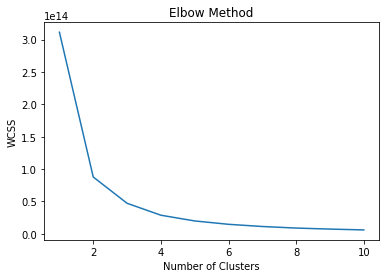

In [ ]:
get_elbow_curve(numeric_cols_df = df_scaled_train[numeric_cols], max_clusters=10)

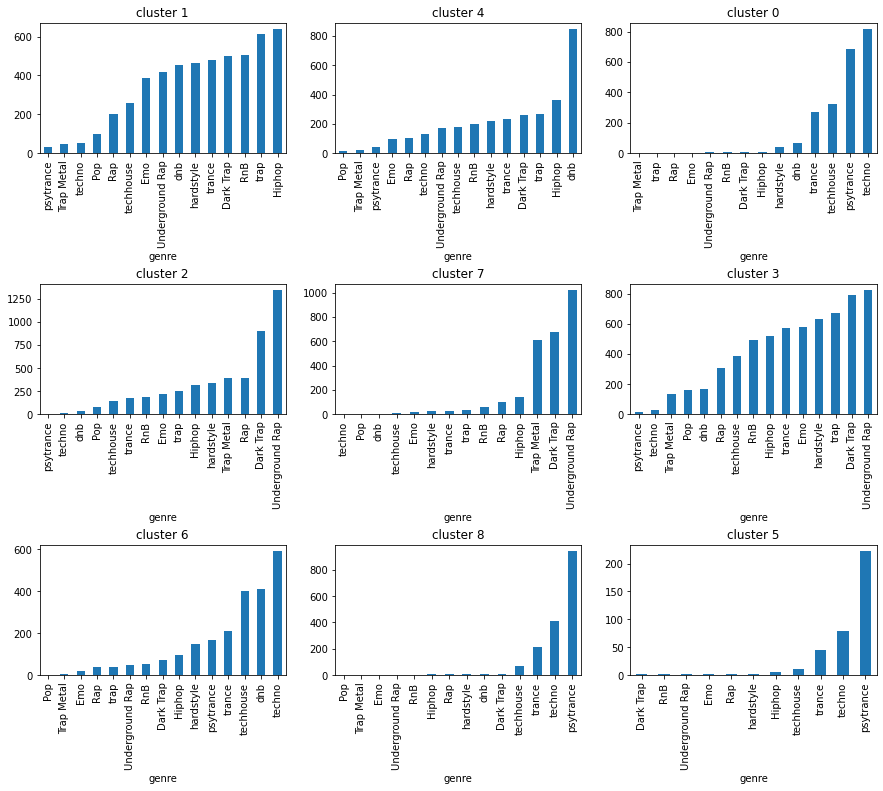

In [ ]:
# instantiating model using # of clusters recommended above
n_clusters = 9
kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

# predict the labels of clusters. kmeans.fit_predict method returns the array of cluster labels each data point belongs to.
label1 = kmeans.fit_predict(df_scaled_train[numeric_cols])

km1_df = pd.concat([df_scaled_train, pd.Series(label1)], axis=1).rename(columns={0:'cluster'})

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,12))
plt.subplots_adjust(hspace=1)

for cluster, ax in zip(km1_df['cluster'].unique(), axs.ravel()):
    km1_df[km1_df['cluster']==cluster].groupby('genre')['id'].count().sort_values().plot.bar(title = 'cluster '+ str(cluster), ax=ax)

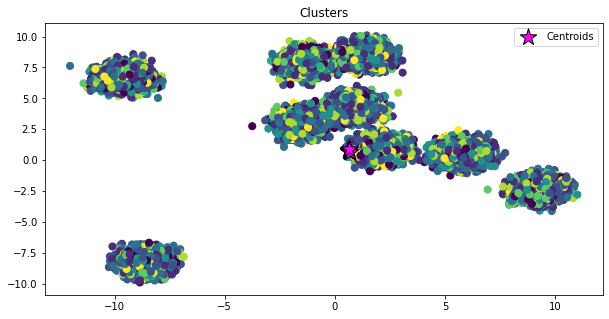

In [ ]:
# Make blobs
X, y = make_blobs(n_samples = 28701, centers=9, cluster_std = 0.5, random_state = 0)

# Plot clusters
plt.figure(figsize=(10,5))
plt.scatter(X[:, 0], X[:, 1], c = label1, s=50)

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, marker='*', edgecolor='black', c= 'magenta', label= 'Centroids')
plt.title('Clusters')
plt.legend()

#### KM2: Normalized Features Unbalanced Dataset

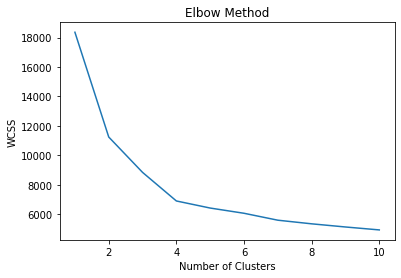

In [ ]:
# finding out the proper number of clusters
get_elbow_curve(numeric_cols_df = df_scaled_train[numeric_cols_norm], max_clusters=10)

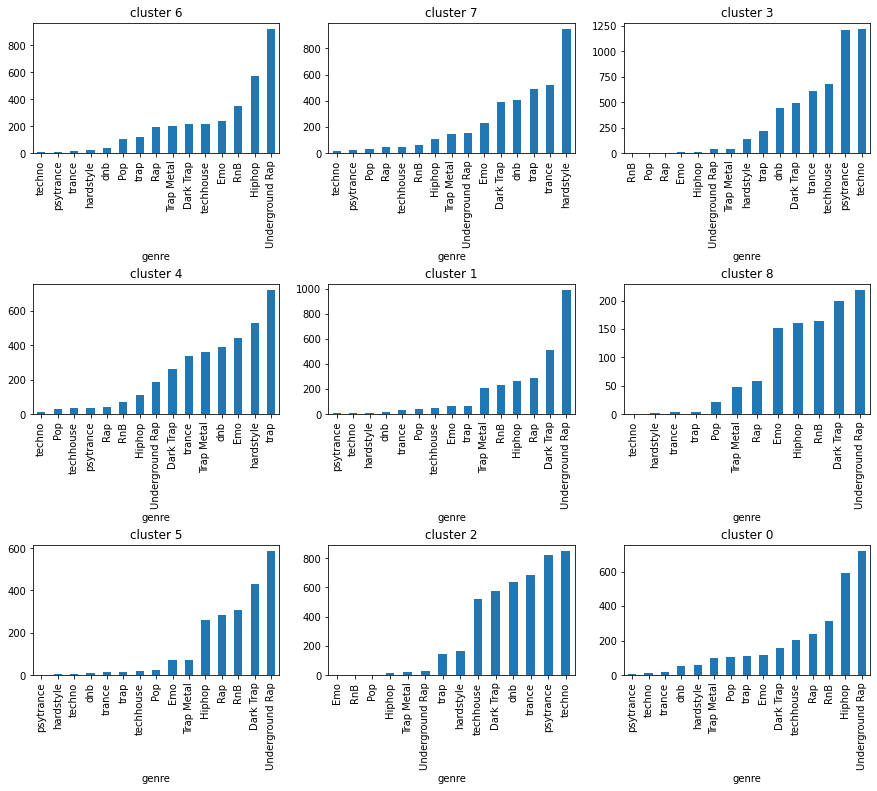

In [ ]:
# instantiating model using # of clusters recommended above
n_clusters = 9
kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

# predict the labels of clusters. kmeans.fit_predict method returns the array of cluster labels each data point belongs to.
label2 = kmeans.fit_predict(df_scaled_train[numeric_cols_norm])

km2_df = pd.concat([df_scaled_train, pd.Series(label2)], axis=1).rename(columns={0:'cluster'})

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,12))
plt.subplots_adjust(hspace=1)

for cluster, ax in zip(km2_df['cluster'].unique(), axs.ravel()):
    km2_df[km2_df['cluster']==cluster].groupby('genre')['id'].count().sort_values().plot.bar(title = 'cluster '+ str(cluster), ax=ax)

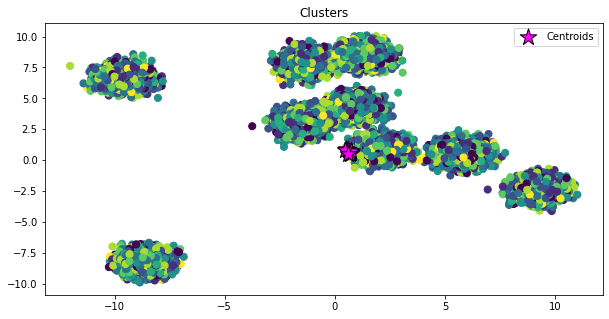

In [ ]:
# Make blobs
X, y = make_blobs(n_samples = 28701, centers=9, cluster_std = 0.5, random_state = 0)

# Plot clusters
plt.figure(figsize=(10,5))
plt.scatter(X[:, 0], X[:, 1], c = label2, s=50)

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, marker='*', edgecolor='black', c= 'magenta', label= 'Centroids')
plt.title('Clusters')
plt.legend()

#### KM3: Standardized Features Unbalanced Dataset

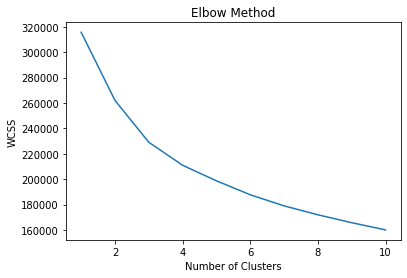

In [ ]:
# finding out the proper number of clusters
get_elbow_curve(numeric_cols_df = df_scaled_train[numeric_cols_std], max_clusters=10)

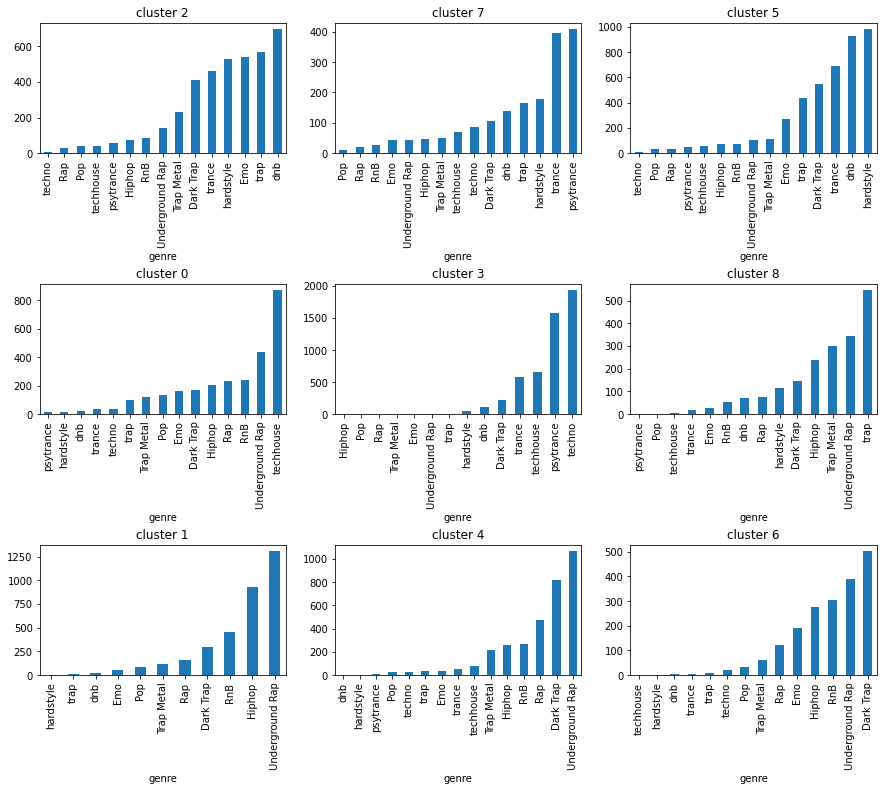

In [ ]:
# instantiating model using # of clusters recommended above
n_clusters = 9
kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

# predict the labels of clusters. kmeans.fit_predict method returns the array of cluster labels each data point belongs to.
label3 = kmeans.fit_predict(df_scaled_train[numeric_cols_std])

km3_df = pd.concat([df_scaled_train, pd.Series(label3)], axis=1).rename(columns={0:'cluster'})

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,12))
plt.subplots_adjust(hspace=1)

for cluster, ax in zip(km3_df['cluster'].unique(), axs.ravel()):
    km3_df[km3_df['cluster']==cluster].groupby('genre')['id'].count().sort_values().plot.bar(title = 'cluster '+ str(cluster), ax=ax)

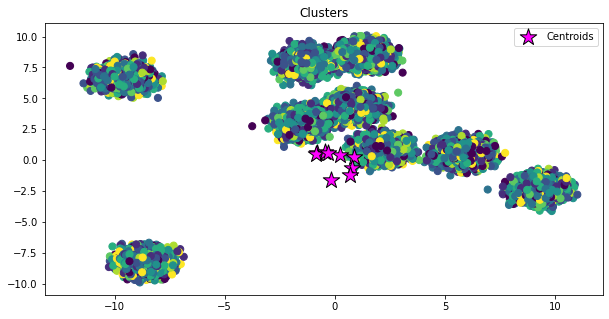

In [ ]:
# Make blobs
X, y = make_blobs(n_samples = 28701, centers=9, cluster_std = 0.5, random_state = 0)

# Plot clusters
plt.figure(figsize=(10,5))
plt.scatter(X[:, 0], X[:, 1], c = label3, s=50)

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, marker='*', edgecolor='black', c= 'magenta', label= 'Centroids')
plt.title('Clusters')
plt.legend()

#### KM 4: Normalized Features on Balanced Dataset

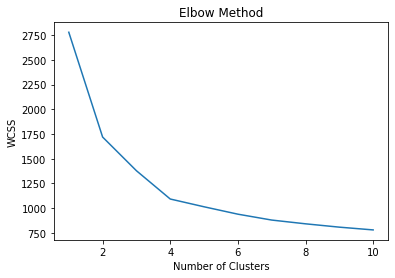

In [ ]:
# finding out the proper number of clusters
get_elbow_curve(numeric_cols_df = df_bal_us_scaled_train[numeric_cols_norm], max_clusters=10)

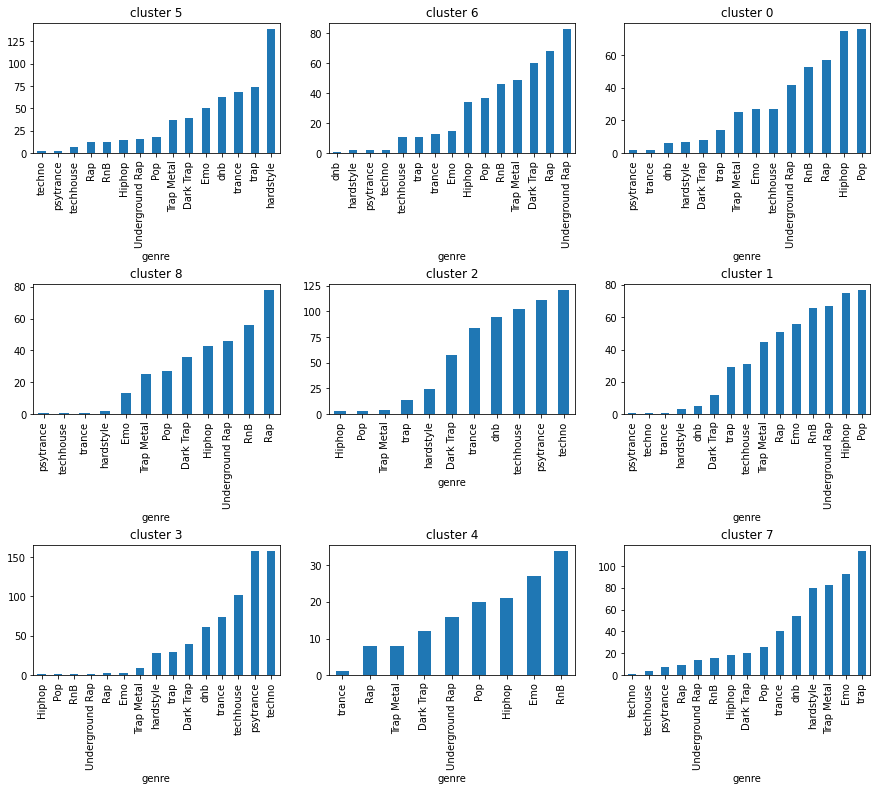

In [ ]:
# instantiating model using # of clusters recommended above
n_clusters = 9
kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

# predict the labels of clusters. kmeans.fit_predict method returns the array of cluster labels each data point belongs to.
label4 = kmeans.fit_predict(df_bal_us_scaled_train[numeric_cols_norm])

km4_df = pd.concat([df_bal_us_scaled_train, pd.Series(label4)], axis=1).rename(columns={0:'cluster'})

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,12))
plt.subplots_adjust(hspace=1)

for cluster, ax in zip(km4_df['cluster'].unique(), axs.ravel()):
    km4_df[km4_df['cluster']==cluster].groupby('genre')['id'].count().sort_values().plot.bar(title = 'cluster '+ str(cluster), ax=ax)

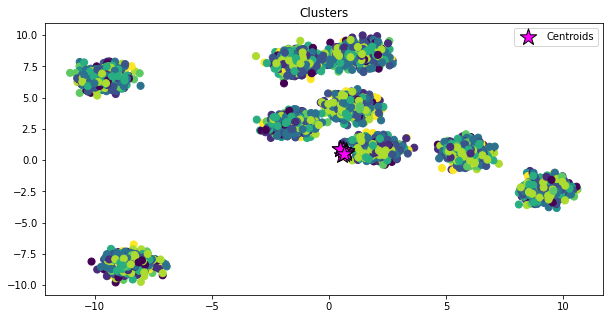

In [ ]:
# Make blobs
X, y = make_blobs(n_samples = 4275, centers=9, cluster_std = 0.5, random_state = 0)

# Plot clusters
plt.figure(figsize=(10,5))
plt.scatter(X[:, 0], X[:, 1], c = label4, s=50)

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, marker='*', edgecolor='black', c= 'magenta', label= 'Centroids')
plt.title('Clusters')
plt.legend()

#### KM5: Standardized Features on Balanced Dataset

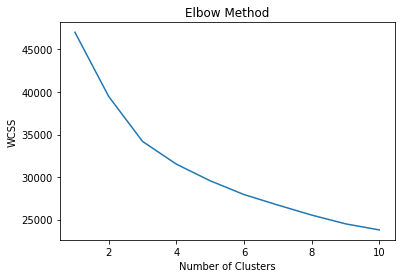

In [ ]:
# finding out the proper number of clusters
get_elbow_curve(numeric_cols_df = df_bal_us_scaled_train[numeric_cols_std], max_clusters=10)

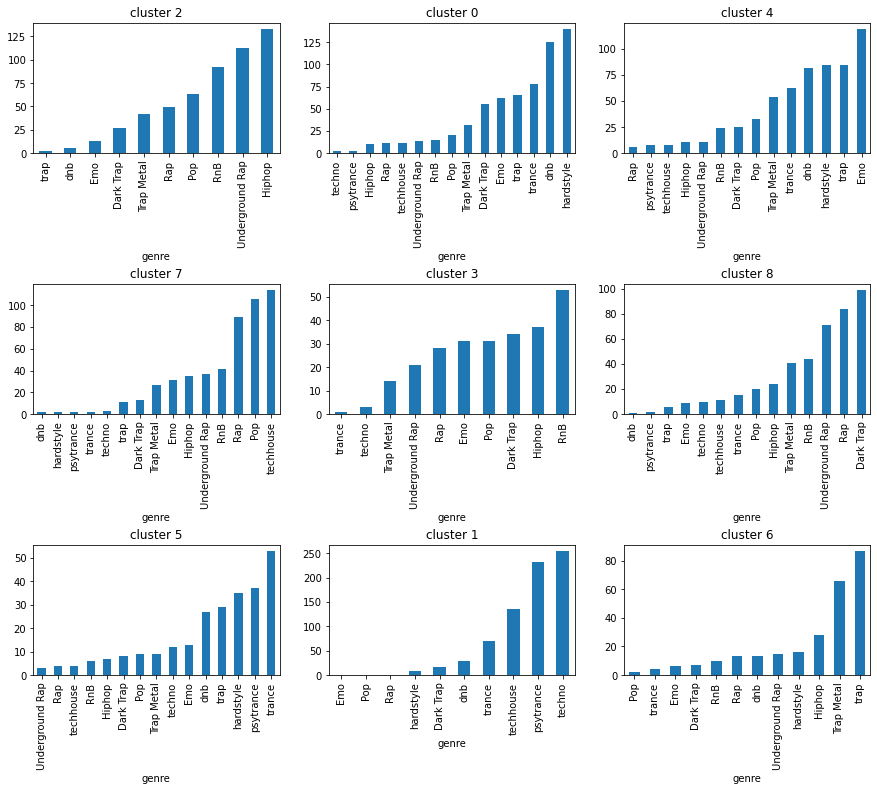

In [ ]:
# instantiating model using # of clusters recommended above
n_clusters = 9
kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

# predict the labels of clusters. kmeans.fit_predict method returns the array of cluster labels each data point belongs to.
label5 = kmeans.fit_predict(df_bal_us_scaled_train[numeric_cols_std])

km5_df = pd.concat([df_bal_us_scaled_train, pd.Series(label5)], axis=1).rename(columns={0:'cluster'})

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,12))
plt.subplots_adjust(hspace=1)

for cluster, ax in zip(km5_df['cluster'].unique(), axs.ravel()):
    km5_df[km5_df['cluster']==cluster].groupby('genre')['id'].count().sort_values().plot.bar(title = 'cluster '+ str(cluster), ax=ax)

(0.0, 9.0)

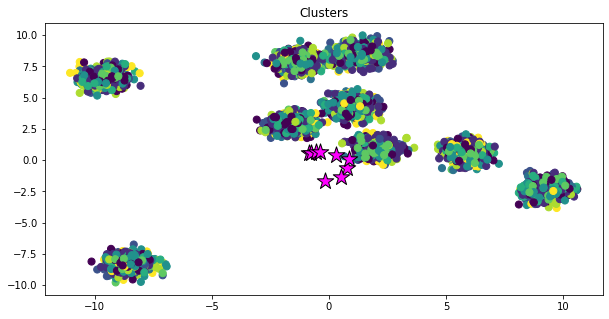

In [ ]:
# Make blobs
X, y = make_blobs(n_samples = 4275, centers=9, cluster_std = 0.5, random_state = 0)

# Plot clusters
plt.figure(figsize=(10,5))
plt.scatter(X[:, 0], X[:, 1], c = label5, s=50)

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, marker='*', edgecolor='black', c= 'magenta', label= 'Centroids')
plt.title('Clusters')
ax.legend(numpoints=1, loc='upper right')
ax.set_xlim([0, label5.max() + 1])

In [ ]:
km1_df['cluster'].value_counts()

3    6276
1    5146
2    4775
4    3155
7    2745
6    2298
0    2254
8    1680
5     372
Name: cluster, dtype: int64

In [ ]:
km2_df['cluster'].value_counts()

3    5108
2    4466
7    3619
4    3570
6    3216
0    2798
1    2784
5    2106
8    1034
Name: cluster, dtype: int64

In [ ]:
km3_df['cluster'].value_counts()

3    5155
5    4395
2    3907
1    3451
4    3368
0    2776
8    1937
6    1926
7    1786
Name: cluster, dtype: int64

In [ ]:
km4_df['cluster'].value_counts()

3    668
2    619
7    579
5    558
1    520
6    434
0    421
8    329
4    147
Name: cluster, dtype: int64

In [ ]:
km5_df['cluster'].value_counts()

1    751
0    645
4    611
2    540
7    515
8    437
6    267
5    256
3    253
Name: cluster, dtype: int64

## KNN (Daisy/Shuo)
    Models:
        KNN1. Unscaled
            - Features: numeric_cols
        KNN2. Normalized
            - Features: numeric_cols_norm
        KNN3. Standardized
            -Features: numeric_cols_std

####KNN1. Unscaled Features on Unbalanced data

In [ ]:
#Separate the dependent and independent data variables into X and y.
X = df_scaled_train[numeric_cols]
y = df_scaled_train['genre']

# Splitting the dataset into 80% training data and 20% testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

# Building the KNN Model on our dataset
KNN1 = KNeighborsClassifier(n_neighbors=5)
KNN1.fit(X_train, y_train)

# Predict testing data
y_pred = KNN1.predict(X_test)

# Get accuracy score
#accuracy_score(y_test, y_pred)
print('Training Accuracy: ', KNN1.score(X_train, y_train))
print('Test Accuracy: ', KNN1.score(X_test, y_test))

Training Accuracy:  0.4805313588850174
Test Accuracy:  0.2550078383556872


In [ ]:
#target_col_encoded

####KNN2. Normalized Features on Unbalanced Data

In [ ]:
#Separate the dependent and independent data variables into X and y.
X = df_scaled_train[numeric_cols_norm]
y = df_scaled_train['genre']

# Splitting the dataset into 80% training data and 20% testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

# Building the KNN Model on our dataset
KNN2 = KNeighborsClassifier(n_neighbors=5)
KNN2.fit(X_train, y_train)

# Predict testing data
y_pred = KNN2.predict(X_test)

# Get accuracy score
print('Training Accuracy: ', KNN2.score(X_train, y_train))
print('Test Accuracy: ', KNN2.score(X_test, y_test))

Training Accuracy:  0.6909407665505226
Test Accuracy:  0.5518202403762411


####KNN3. Normalized Features on Balanced Data

In [ ]:
#Separate the dependent and independent data variables into X and y.
X = df_bal_us_scaled_train[numeric_cols_norm]
y = df_bal_us_scaled_train['genre']

# Splitting the dataset into 80% training data and 20% testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

# Building the KNN Model on our dataset
KNN3 = KNeighborsClassifier(n_neighbors=5)
KNN3.fit(X_train, y_train)

# Predict testing data
y_pred = KNN3.predict(X_test)

# Get accuracy score
print('Training Accuracy: ', KNN3.score(X_train, y_train))
print('Test Accuracy: ', KNN3.score(X_test, y_test))

Training Accuracy:  0.6450292397660818
Test Accuracy:  0.47134502923976607


####KNN4. Standardized Features on Unbalanced Data

In [ ]:
#Separate the dependent and independent data variables into X and y.
X = df_scaled_train[numeric_cols_std]
y = df_scaled_train['genre']

# Splitting the dataset into 80% training data and 20% testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

# Building the KNN Model on our dataset
KNN4 = KNeighborsClassifier(n_neighbors=5)
KNN4.fit(X_train, y_train)

# Predict testing data
y_pred = KNN4.predict(X_test)

# Get accuracy score
print('Training Accuracy: ', KNN4.score(X_train, y_train))
print('Test Accuracy: ', KNN4.score(X_test, y_test))

Training Accuracy:  0.7043989547038327
Test Accuracy:  0.5664518376589445


####KNN5. Standardized Features on Balanced Data

In [ ]:
#Separate the dependent and independent data variables into X and y.
X = df_bal_us_scaled_train[numeric_cols_std]
y = df_bal_us_scaled_train['genre']

# Splitting the dataset into 80% training data and 20% testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

# Building the KNN Model on our dataset
KNN5 = KNeighborsClassifier(n_neighbors=5)
KNN5.fit(X_train, y_train)

# Predict testing data
y_pred = KNN5.predict(X_test)

# Get accuracy score
print('Training Accuracy: ', KNN5.score(X_train, y_train))
print('Test Accuracy: ', KNN5.score(X_test, y_test))

Training Accuracy:  0.65
Test Accuracy:  0.49239766081871345


## Logistic Regression (Iris/Shuo) - EDITING
    Models:
        LR1. Unscaled for each genre
            - Features: numeric_cols
            - DF: df_scaled_****
        LR2. Normalized for each genre
            - Features: numeric_cols_norm
            - DF: df_scaled_****
        LR3. Standardized for each genre
            -Features: numeric_cols_std
            - DF: df_scaled_****
        LR4. Unscaled for each genre, balanced dataset
            - Features: numeric_cols
            - DF: df_bal_us_scaled_****
        LR5. Normalized for each genre, balanced dataset
            - Features: numeric_cols_norm
            - DF: df_bal_us_scaled_****
        LR6. Standardized for each genre, balanced dataset
            -Features: numeric_cols_std
            - DF: df_bal_us_scaled_****

In [28]:
# genre_dict = {"Dark Trap": 0,
#              "Underground Rap": 1,
#              "Trap Metal": 2,
#              "Emo": 3,
#              "Rap": 4,
#              "RnB": 5,
#              "Pop": 6,
#              "Hiphop": 7,
#              "techhouse": 8,
#              "techno": 9,
#              "trance": 10,
#              "psytrance": 11,
#              "trap": 12,
#              "dnb": 13,
#              "hardstyle": 14}
# df_bal_us_scaled_train["genre_de"] = [genre_dict[i] for i in df_bal_us_scaled_train["genre"]]
# df_scaled_train["genre_de"] = [genre_dict[i] for i in df_scaled_train["genre"]]
# df_scaled_test["genre_de"] = [genre_dict[i] for i in df_scaled_test["genre"]]

In [29]:
# Imbalanced, Raw, Standardized, Normalized Columns - Training
X_train_unscaled = df_scaled_train[numeric_cols]
X_train_std = df_scaled_train[numeric_cols_std]
X_train_norm = df_scaled_train[numeric_cols_norm]

# Balanced (Undersample), Standardized, Normalized - Training
X_train_us_unscaled = df_bal_us_scaled_train[numeric_cols]
X_train_us_std = df_bal_us_scaled_train[numeric_cols_std]
X_train_us_norm = df_bal_us_scaled_train[numeric_cols_norm]

# Imbalanced, Raw, Standardized, Normalized Columns - Test
X_test_unscaled = df_scaled_test[numeric_cols]
X_test_std = df_scaled_test[numeric_cols_std]
X_test_norm = df_scaled_test[numeric_cols_norm]

# Prediction
Y_train_imbalanced = df_scaled_train["genre_encoded"]
Y_train_us = df_bal_us_scaled_train["genre_encoded"]
Y_test = df_scaled_test["genre_encoded"]

In [30]:
# # Imbalanced, Raw, Standardized, Normalized Columns - Training
# X_train_unscaled = df_scaled_train[numeric_cols]
# X_train_std = df_scaled_train[numeric_cols_std]
# X_train_norm = df_scaled_train[numeric_cols_norm]

# # Balanced (Undersample), Standardized, Normalized - Training
# X_train_us_unscaled = df_bal_us_scaled_train[numeric_cols]
# X_train_us_std = df_bal_us_scaled_train[numeric_cols_std]
# X_train_us_norm = df_bal_us_scaled_train[numeric_cols_norm]

# # Imbalanced, Raw, Standardized, Normalized Columns - Test
# X_test_unscaled = df_scaled_test[numeric_cols]
# X_test_std = df_scaled_test[numeric_cols_std]
# X_test_norm = df_scaled_test[numeric_cols_norm]

# # Prediction
# Y_train_imbalanced = df_scaled_train["genre_de"]
# Y_train_us = df_bal_us_scaled_train["genre_de"]
# Y_test = df_scaled_test["genre_de"]

In [31]:
# ### IL TESTING ON WHETHER USING SUBSET OF COLUMNS BETTER

# # Imbalanced, Raw, Standardized, Normalized Columns - Training
# X_train_unscaled = df_scaled_train[["energy","duration_ms"]]
# X_train_std = df_scaled_train[["energy_std","duration_ms_std"]]
# X_train_norm = df_scaled_train[["energy_norm","duration_ms_norm"]]

# # Balanced (Undersample), Standardized, Normalized - Training
# X_train_us_unscaled = df_bal_us_scaled_train[["energy","duration_ms"]]
# X_train_us_std = df_bal_us_scaled_train[["energy_std","duration_ms_std"]]
# X_train_us_norm = df_bal_us_scaled_train[["energy_norm","duration_ms_norm"]]

# # Imbalanced, Raw, Standardized, Normalized Columns - Test
# X_test_unscaled = df_scaled_test[["energy","duration_ms"]]
# X_test_std = df_scaled_test[["energy_std","duration_ms_std"]]
# X_test_norm = df_scaled_test[["energy_norm","duration_ms_norm"]]

# # Prediction
# Y_train_imbalanced = df_scaled_train["genre_de"]
# Y_train_us = df_bal_us_scaled_train["genre_de"]
# Y_test = df_scaled_test["genre_de"]

In [32]:
# # Imbalanced, Raw, Standardized, Normalized Columns - Training
# X_train_unscaled = df_scaled_train[numeric_cols+["genre_de"]]
# X_train_std = df_scaled_train[numeric_cols_std+["genre_de"]]
# X_train_norm = df_scaled_train[numeric_cols_norm+["genre_de"]]

# # Balanced (Undersample), Standardized, Normalized - Training
# X_train_us_unscaled = df_bal_us_scaled_train[numeric_cols+["genre_de"]]
# X_train_us_std = df_bal_us_scaled_train[numeric_cols_std+["genre_de"]]
# X_train_us_norm = df_bal_us_scaled_train[numeric_cols_norm+["genre_de"]]

# # Imbalanced, Raw, Standardized, Normalized Columns - Test
# X_test_unscaled = df_scaled_test[numeric_cols+["genre_de"]]
# X_test_std = df_scaled_test[numeric_cols_std+["genre_de"]]
# X_test_norm = df_scaled_test[numeric_cols_norm+["genre_de"]]

# # Prediction
# Y_train_imbalanced = df_scaled_train["genre_de"]
# Y_train_us = df_bal_us_scaled_train["genre_de"]
# Y_test = df_scaled_test["genre_de"]

In [33]:
# ### IL TESTING ON WHETHER USING SUBSET OF COLUMNS BETTER

# # Imbalanced, Raw, Standardized, Normalized Columns - Training
# X_train_unscaled = df_scaled_train[["energy","duration_ms","genre_de"]]
# X_train_std = df_scaled_train[["energy_std","duration_ms_std","genre_de"]]
# X_train_norm = df_scaled_train[["energy_norm","duration_ms_norm","genre_de"]]

# # Balanced (Undersample), Standardized, Normalized - Training
# X_train_us_unscaled = df_bal_us_scaled_train[["energy","duration_ms","genre_de"]]
# X_train_us_std = df_bal_us_scaled_train[["energy_std","duration_ms_std","genre_de"]]
# X_train_us_norm = df_bal_us_scaled_train[["energy_norm","duration_ms_norm","genre_de"]]

# # Imbalanced, Raw, Standardized, Normalized Columns - Test
# X_test_unscaled = df_scaled_test[["energy","duration_ms","genre_de"]]
# X_test_std = df_scaled_test[["energy_std","duration_ms_std","genre_de"]]
# X_test_norm = df_scaled_test[["energy_norm","duration_ms_norm","genre_de"]]

# # Prediction
# Y_train_imbalanced = df_scaled_train["genre_de"]
# Y_train_us = df_bal_us_scaled_train["genre_de"]
# Y_test = df_scaled_test["genre_de"]

In [34]:
def build_model(n_classes, learning_rate = 0.01):
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(
      units=n_classes,
      activation='softmax'
  ))

  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

  model.compile(loss="sparse_categorical_crossentropy",
                optimizer = optimizer,
                metrics=['accuracy'])
  return model

In [35]:
LR_test_accuracies = []

LR1. Unscaled for each genre and on the imbalanced training set

In [36]:
model = build_model(Y_train_imbalanced.nunique(), 0.01)
history = model.fit(
    x=X_train_unscaled,
    y=Y_train_imbalanced,
    epochs=20,
    batch_size=64, 
    validation_split=0.1,
    verbose=0)

history = pd.DataFrame(history.history)
display(history)

test_predictions = np.argmax(model.predict(X_test_unscaled), axis = 1)
accuracy = np.mean(test_predictions == Y_test)
print(f'accuracy: {accuracy}')
LR_test_accuracies.append(["LR1",accuracy])

,loss,accuracy,val_loss,val_accuracy
0,10147.349609,0.080798,1656.952637,0.071752
1,1748.603760,0.089818,1676.251465,0.086381
2,1586.845337,0.097561,1967.312622,0.070010
3,1604.250000,0.101007,2641.818604,0.063044
4,1526.097412,0.099923,1453.904663,0.040752
5,1389.608032,0.112815,1466.609009,0.170672
6,1339.294678,0.114905,1864.707642,0.063393
7,1368.255371,0.113357,1425.929688,0.102403
8,1361.030151,0.119512,1194.782227,0.065482
9,1280.436768,0.120867,893.256775,0.174155


225/225 [==============================] - 0s 1ms/step
accuracy: 0.1350334448160535


LR2. Normalized for each genre and on the imbalanced training set

In [37]:
model = build_model(Y_train_imbalanced.nunique(), 0.01)
history = model.fit(
    x=X_train_norm,
    y=Y_train_imbalanced,
    epochs=20,
    batch_size=64, 
    validation_split=0.1,
    verbose=0)

history = pd.DataFrame(history.history)
display(history)

test_predictions = np.argmax(model.predict(X_test_norm), axis = 1)
accuracy = np.mean(test_predictions == Y_test)
print(f'accuracy: {accuracy}')
LR_test_accuracies.append(["LR2",accuracy])

,loss,accuracy,val_loss,val_accuracy
0,2.120971,0.320209,1.833029,0.408220
1,1.752805,0.436585,1.656512,0.462905
2,1.630730,0.472861,1.570947,0.503657
3,1.560367,0.498374,1.516706,0.517938
4,1.514879,0.509369,1.476563,0.515848
5,1.482482,0.520093,1.447853,0.521421
6,1.456714,0.530043,1.427320,0.532567
7,1.437506,0.533333,1.410176,0.533960
8,1.421265,0.538947,1.396320,0.545455
9,1.409146,0.541386,1.384767,0.554162


225/225 [==============================] - 0s 2ms/step
accuracy: 0.5674470457079153


LR3. Standardized for each genre and on the imbalanced training set

In [38]:
model = build_model(Y_train_imbalanced.nunique(), 0.01)
history = model.fit(
    x=X_train_std,
    y=Y_train_imbalanced,
    epochs=20,
    batch_size=64, 
    validation_split=0.1,
    verbose=0)

history = pd.DataFrame(history.history)
display(history)

test_predictions = np.argmax(model.predict(X_test_std), axis = 1)
accuracy = np.mean(test_predictions == Y_test)
print(f'accuracy: {accuracy}')
LR_test_accuracies.append(["LR3",accuracy])

,loss,accuracy,val_loss,val_accuracy
0,1.543211,0.500155,1.315702,0.577499
1,1.313790,0.565118,1.281806,0.578196
2,1.292813,0.572280,1.268971,0.583420
3,1.284559,0.576732,1.260925,0.591432
4,1.280118,0.575919,1.259880,0.583769
5,1.278666,0.575726,1.257947,0.590735
6,1.276605,0.577700,1.258024,0.588297
7,1.275730,0.579559,1.253976,0.589690
8,1.274963,0.576461,1.252723,0.597701
9,1.275326,0.578320,1.258009,0.591432


225/225 [==============================] - 0s 2ms/step
accuracy: 0.5908584169453734


LR4. Unscaled for each genre, balanced via undersample training set

In [39]:
model = build_model(Y_train_us.nunique(), 0.01)
history = model.fit(
    x=X_train_us_unscaled,
    y=Y_train_us,
    epochs=20,
    batch_size=64, 
    validation_split=0.1,
    verbose=0)

history = pd.DataFrame(history.history)
display(history)

test_predictions = np.argmax(model.predict(X_test_unscaled), axis = 1)
accuracy = np.mean(test_predictions == Y_test)
print(f'accuracy: {accuracy}')
LR_test_accuracies.append(["LR4",accuracy])

,loss,accuracy,val_loss,val_accuracy
0,58139.671875,0.065506,11577.204102,0.000000
1,2417.595215,0.077723,9413.541992,0.000000
2,1945.926636,0.075643,9821.141602,0.000000
3,1616.107910,0.070964,12100.844727,0.000000
4,2022.963257,0.074344,11018.546875,0.000000
5,1557.753296,0.083442,11402.756836,0.000000
6,1872.087036,0.074864,11465.918945,0.000000
7,1561.282227,0.076683,11102.266602,0.000000
8,1693.616333,0.080582,11150.535156,0.000000
9,1456.961304,0.093839,10060.602539,0.000000


225/225 [==============================] - 0s 1ms/step
accuracy: 0.07190635451505016


LR5. Normalized for each genre, balanced via undersample training set

In [40]:
model = build_model(Y_train_us.nunique(), 0.01)
history = model.fit(
    x=X_train_us_norm,
    y=Y_train_us,
    epochs=20,
    batch_size=64, 
    validation_split=0.1,
    verbose=0)

history = pd.DataFrame(history.history)
display(history)

test_predictions = np.argmax(model.predict(X_test_norm), axis = 1)
accuracy = np.mean(test_predictions == Y_test)
print(f'accuracy: {accuracy}')
LR_test_accuracies.append(["LR5",accuracy])

,loss,accuracy,val_loss,val_accuracy
0,2.569030,0.157525,4.147889,0.000000
1,2.291187,0.288796,4.704135,0.000000
2,2.132168,0.342865,4.977474,0.000000
3,2.020722,0.386535,5.211706,0.000000
4,1.938533,0.417208,5.425688,0.000000
5,1.877167,0.421887,5.534717,0.002336
6,1.825280,0.427606,5.724350,0.000000
7,1.785491,0.435924,5.866946,0.000000
8,1.751799,0.439043,5.998183,0.000000
9,1.721073,0.441643,6.058345,0.002336


225/225 [==============================] - 0s 1ms/step
accuracy: 0.40774804905239687


LR6. Standardized for each genre, balanced via undersample training set

In [41]:
model = build_model(Y_train_us.nunique(), 0.01)
history = model.fit(
    x=X_train_us_std,
    y=Y_train_us,
    epochs=20,
    batch_size=64, 
    validation_split=0.1,
    verbose=0)

history = pd.DataFrame(history.history)
display(history)

test_predictions = np.argmax(model.predict(X_test_std), axis = 1)
accuracy = np.mean(test_predictions == Y_test)
print(f'accuracy: {accuracy}')
LR_test_accuracies.append(["LR6",accuracy])

,loss,accuracy,val_loss,val_accuracy
0,2.208592,0.269301,3.263067,0.023364
1,1.635283,0.477255,3.538017,0.053738
2,1.504504,0.505849,3.692422,0.098131
3,1.444245,0.517286,3.858887,0.107477
4,1.410451,0.534442,4.000360,0.126168
5,1.389840,0.533403,4.072928,0.135514
6,1.375592,0.538602,4.214528,0.128505
7,1.364267,0.543800,4.317029,0.128505
8,1.356279,0.541201,4.399011,0.123832
9,1.349099,0.542501,4.436446,0.149533


225/225 [==============================] - 0s 1ms/step
accuracy: 0.483695652173913


In [42]:
pd.DataFrame(LR_test_accuracies, columns=["Model","Validation Accuracy"])

,Model,Validation Accuracy
0,LR1,0.135033
1,LR2,0.567447
2,LR3,0.590858
3,LR4,0.071906
4,LR5,0.407748
5,LR6,0.483696


In [43]:
### VISUAL
# # Create a confusion matrix as a 2D array.
# confusion_matrix = tf.math.confusion_matrix(Y_test, test_preds_labels)

# # Use a heatmap plot to display it.
# ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',
#                  xticklabels=colnames, yticklabels=colnames, cbar=False)

# # Add axis labels.
# ax.set(xlabel='Predicted Label', ylabel='True Label')
# plt.show()

## Random Forest (Iris/Shuo) - Editing
    Models:
       RF1. Unbalanced dataset, no numeric scaling
       RF2. Unbalanced dataset, normalization
       RF3. Unbalanced dataset, standardization
       RF4. Balanced dataset, no numeric scaling
       RF5. Balanced dataset, normalization
       RF6. Balanced dataset, standardization

### RF1: Unbalanced dataset, no numeric scaling

In [51]:
# Unbalanced dataset, no numeric scaling
rf_cols = numeric_cols + categorical_cols

X_train = df_scaled_train[rf_cols]
Y_train = np.array(df_scaled_train[target_col_encoded])
X_test = df_scaled_test[rf_cols]
Y_test = np.array(df_scaled_test[target_col_encoded])

In [52]:
# Instantiate model with 500 decision trees
rf = RandomForestClassifier(n_estimators = 500, random_state = 1)

# Train the model on training data
rf.fit(X_train, Y_train)

# Use the forest's predict method on the test data
predictions = rf.predict(X_test)# Calculate the absolute errors
errors = abs(predictions - Y_test)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

<ipython-input-52-02623fc4a25f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


Mean Absolute Error: 4.98


Accuracy: 0.7031772575250836


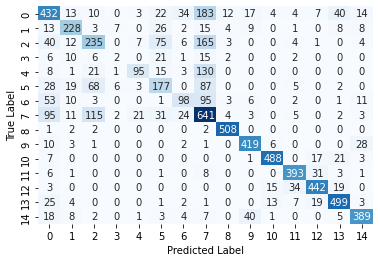

In [53]:
print('Accuracy:', accuracy_score(Y_test, predictions))

confusion_matrix = tf.math.confusion_matrix(Y_test, predictions)

ax = sns.heatmap(confusion_matrix, annot = True, fmt = '.3g', cmap = 'Blues',  cbar = False)

ax.set(xlabel = 'Predicted Label', ylabel = 'True Label')

plt.show()

In [55]:
# param_grid = {'n_estimators': [100, 500, 1000],
#               'criterion': ['gini', 'entropy']}
# grid = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, refit = True, verbose = 3, n_jobs = -1, cv = 5, scoring = 'accuracy')
# grid.fit(X_train, Y_train)

# grid.best_estimator_
# y_pred_bestRF = grid.predict(X_test)
# accuracy_score(Y_test,y_pred_bestRF)

### RF2. Unbalanced dataset, normalization

In [ ]:
# Unbalanced dataset, normalization
rf_cols = numeric_cols_norm + categorical_cols

X_train = df_scaled_train[rf_cols]
Y_train = np.array(df_scaled_train[target_col_encoded])
X_test = df_scaled_test[rf_cols]
Y_test = np.array(df_scaled_test[target_col_encoded])

In [ ]:
# Instantiate model with 500 decision trees
rf = RandomForestClassifier(n_estimators = 500, random_state = 42)

# Train the model on training data
rf.fit(X_train, Y_train)

# Use the forest's predict method on the test data
predictions = rf.predict(X_test)# Calculate the absolute errors
errors = abs(predictions - Y_test)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

In [ ]:
print('Accuracy:', accuracy_score(Y_test, predictions))

confusion_matrix = tf.math.confusion_matrix(Y_test, predictions)

ax = sns.heatmap(confusion_matrix, annot = True, fmt = '.3g', cmap = 'Blues',  cbar = False)

ax.set(xlabel = 'Predicted Label', ylabel = 'True Label')

plt.show()

### RF3. Unbalanced dataset, standardization

In [ ]:
# Unbalanced dataset, standardization
rf_cols = numeric_cols_std + categorical_cols

X_train = df_scaled_train[rf_cols]
Y_train = np.array(df_scaled_train[target_col_encoded])
X_test = df_scaled_test[rf_cols]
Y_test = np.array(df_scaled_test[target_col_encoded])

In [ ]:
# Instantiate model with 500 decision trees
rf = RandomForestClassifier(n_estimators = 500, random_state = 42)

# Train the model on training data
rf.fit(X_train, Y_train)

# Use the forest's predict method on the test data
predictions = rf.predict(X_test)# Calculate the absolute errors
errors = abs(predictions - Y_test)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

In [ ]:
print('Accuracy:', accuracy_score(Y_test, predictions))

confusion_matrix = tf.math.confusion_matrix(Y_test, predictions)

ax = sns.heatmap(confusion_matrix, annot = True, fmt = '.3g', cmap = 'Blues',  cbar = False)

ax.set(xlabel = 'Predicted Label', ylabel = 'True Label')

plt.show()

### RF4. Balanced dataset, no numeric scaling

In [ ]:
# Balanced dataset, no numeric scaling
rf_cols = numeric_cols + categorical_cols

X_train = df_scaled_train[rf_cols]
Y_train = np.array(df_scaled_train[target_col_encoded])
X_test = df_scaled_test[rf_cols]
Y_test = np.array(df_scaled_test[target_col_encoded])

In [ ]:
# Instantiate model with 500 decision trees
rf = RandomForestClassifier(n_estimators = 500, random_state = 42)

# Train the model on training data
rf.fit(X_train, Y_train)

# Use the forest's predict method on the test data
predictions = rf.predict(X_test)# Calculate the absolute errors
errors = abs(predictions - Y_test)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

In [ ]:
print('Accuracy:', accuracy_score(Y_test, predictions))

confusion_matrix = tf.math.confusion_matrix(Y_test, predictions)

ax = sns.heatmap(confusion_matrix, annot = True, fmt = '.3g', cmap = 'Blues',  cbar = False)

ax.set(xlabel = 'Predicted Label', ylabel = 'True Label')

plt.show()

### RF5. Balanced dataset, normalization

In [ ]:
# Balanced dataset, normalization
rf_cols = numeric_cols_norm + categorical_cols

X_train = df_scaled_train[rf_cols]
Y_train = np.array(df_scaled_train[target_col_encoded])
X_test = df_scaled_test[rf_cols]
Y_test = np.array(df_scaled_test[target_col_encoded])

In [ ]:
# Instantiate model with 500 decision trees
rf = RandomForestClassifier(n_estimators = 500, random_state = 42)

# Train the model on training data
rf.fit(X_train, Y_train)

# Use the forest's predict method on the test data
predictions = rf.predict(X_test)# Calculate the absolute errors
errors = abs(predictions - Y_test)# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

In [ ]:
print('Accuracy:', accuracy_score(Y_test, predictions))

confusion_matrix = tf.math.confusion_matrix(Y_test, predictions)

ax = sns.heatmap(confusion_matrix, annot = True, fmt = '.3g', cmap = 'Blues',  cbar = False)

ax.set(xlabel = 'Predicted Label', ylabel = 'True Label')

plt.show()

### RF6. Balanced dataset, standardization

## Gradient Boosted Trees (Ivan)
    Models:
        

## Neural Network (Ivan/Shuo/Amanda)
    Models:
       NN1. Unbalanced dataset, no numeric scaling
       NN2. Unbalanced dataset, normalization
       NN3. Unbalanced dataset, standardization
       NN4. Balanced dataset, no numeric scaling
       NN5. Balanced dataset, normalization
       NN6. Balanced dataset, standardization
       NN7-NN11. Unbalanced dataset, standardized features, different hyperparamters

In [ ]:
def build_NN_model (n_classes,
                    hidden_layer_sizes=[],
                    activation = 'relu',
                    optimizer = 'SGD',
                    learning_rate = 0.01):
  
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)


  model = keras.Sequential()
  model.add(keras.layers.Flatten())
  for hidden_layer_size in hidden_layer_sizes:
    model.add(tf.keras.layers.Dense(units=hidden_layer_size,
                                    activation=activation))
  model.add(tf.keras.layers.Dense(units=n_classes, activation='softmax', name='output'))
  if optimizer.upper() == 'SGD':
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  elif optimizer.upper() == 'ADAM':
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [ ]:
def train_and_evaluate (X_train,
                        y_train,
                        X_test,
                        y_test,
                        hidden_layer_sizes = [],
                        activation = 'tanh',
                        optimizer = 'Adam',
                        learning_rate = 0.01,
                        num_epochs=5,
                        ):
  model = build_NN_model(n_classes = y_train.nunique(),
                    hidden_layer_sizes=hidden_layer_sizes,
                    activation = activation,
                    optimizer = optimizer,
                    learning_rate = learning_rate)
  # print('Training...')
  history = model.fit(
      x = X_train,
      y = y_train,
      epochs = num_epochs,
      batch_size = 64,
      validation_split = 0.1,
      verbose = 0)
  train_accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  plt.plot(train_accuracy, label='train_accuracy')
  plt.plot(val_accuracy, label='validation_accuracy')
  plt.xticks(range(0,num_epochs,5))
  plt.xlabel('Train_epochs')
  plt.legend()
  plt.show()

  predictions =np.argmax(model.predict(X_test), axis = 1)
  plot_acc_bar(predictions,y_test)

  test_accuracy = model.evaluate(x=X_test, y=Y_test, verbose=0,
                                 return_dict=True)['accuracy']

  print('Test Accuracy:', round(test_accuracy,3))
  print('Training Accuracy:', round(history.history['accuracy'][-1],3))
  print('Validation Accuracy:', round(history.history['val_accuracy'][-1],3))
  return model, predictions

#### NN1: Unbalanced, No Scaling

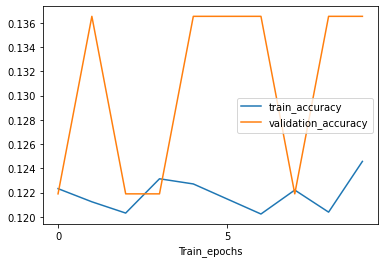

225/225 [==============================] - 0s 1ms/step


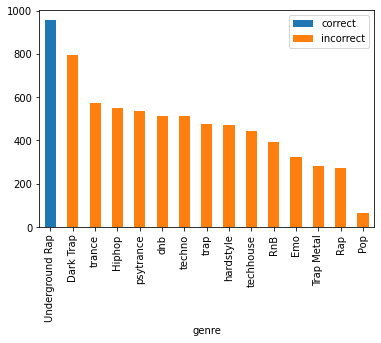

Test Accuracy: 0.133
Training Accuracy: 0.125
Validation Accuracy: 0.137


In [ ]:
nn_cols = numeric_cols + categorical_cols

model, predictions = train_and_evaluate( X_train = df_scaled_train[nn_cols]
                   , y_train = df_scaled_train[target_col_encoded]
                   , X_test = df_scaled_test[nn_cols]
                   , y_test = df_scaled_test[target_col_encoded]
                   , hidden_layer_sizes = [32]
                   , activation = 'tanh'
                   , optimizer = 'Adam'
                   , learning_rate = 0.01
                   , num_epochs=10)



#### NN2: Unbalanced Dataset, Normalization

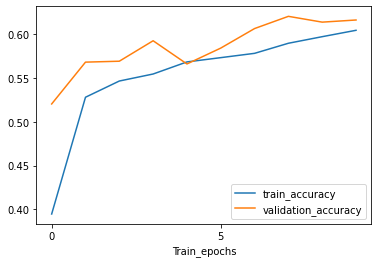

225/225 [==============================] - 0s 1ms/step


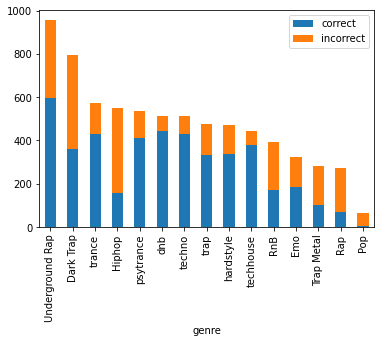

Test Accuracy: 0.615
Training Accuracy: 0.604
Validation Accuracy: 0.616


(<keras.engine.sequential.Sequential at 0x7fb2a700dd00>,
 array([10, 14,  7, ..., 13,  0,  4]))

In [ ]:
nn_cols = numeric_cols_norm + categorical_cols

train_and_evaluate( X_train = df_scaled_train[nn_cols]
                   , y_train = df_scaled_train[target_col_encoded]
                   , X_test = df_scaled_test[nn_cols]
                   , y_test = df_scaled_test[target_col_encoded]
                   , hidden_layer_sizes = [32]
                   , activation = 'tanh'
                   , optimizer = 'Adam'
                   , learning_rate = 0.01
                   , num_epochs=10)

#### NN3: Unbalanced Dataset, Standardization

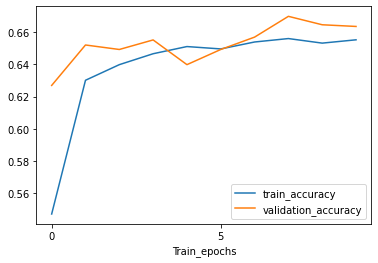

225/225 [==============================] - 0s 1ms/step


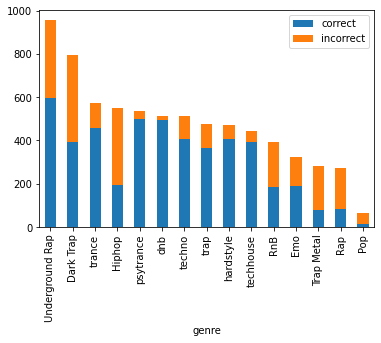

Test Accuracy: 0.664
Training Accuracy: 0.655
Validation Accuracy: 0.664


(<keras.engine.sequential.Sequential at 0x7fb2a6ff0280>,
 array([10, 14,  7, ..., 13,  0,  2]))

In [ ]:
nn_cols = numeric_cols_std + categorical_cols

train_and_evaluate( X_train = df_scaled_train[nn_cols]
                   , y_train = df_scaled_train[target_col_encoded]
                   , X_test = df_scaled_test[nn_cols]
                   , y_test = df_scaled_test[target_col_encoded]
                   , hidden_layer_sizes = [32]
                   , activation = 'tanh'
                   , optimizer = 'Adam'
                   , learning_rate = 0.01
                   , num_epochs=10)

#### NN4: Balanced Dataset, No scaling

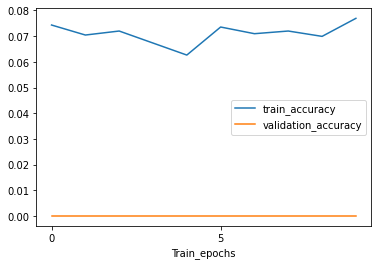

225/225 [==============================] - 0s 1ms/step


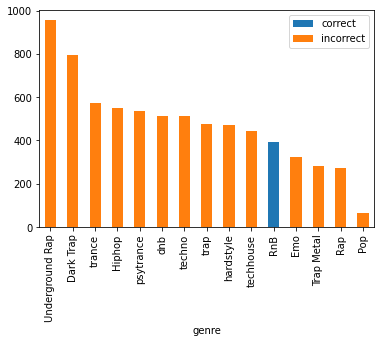

Test Accuracy: 0.055
Training Accuracy: 0.077
Validation Accuracy: 0.0


(<keras.engine.sequential.Sequential at 0x7fb2a6936be0>,
 array([5, 5, 5, ..., 5, 5, 5]))

In [ ]:
nn_cols = numeric_cols + categorical_cols

train_and_evaluate( X_train = df_bal_us_scaled_train[nn_cols]
                   , y_train = df_bal_us_scaled_train[target_col_encoded]
                   , X_test = df_scaled_test[nn_cols]
                   , y_test = df_scaled_test[target_col_encoded]
                   , hidden_layer_sizes = [32]
                   , activation = 'tanh'
                   , optimizer = 'Adam'
                   , learning_rate = 0.01
                   , num_epochs=10)

#### NN5: Balanced Dataset, Normalization

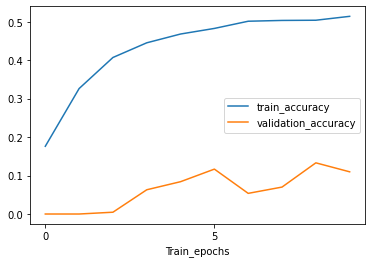

225/225 [==============================] - 0s 2ms/step


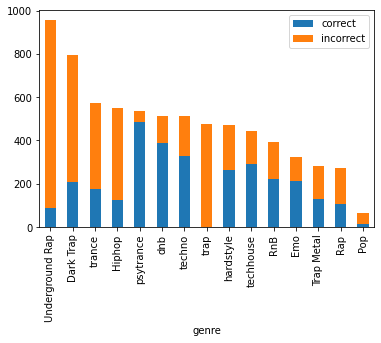

Test Accuracy: 0.424
Training Accuracy: 0.514
Validation Accuracy: 0.11


(<keras.engine.sequential.Sequential at 0x7fb2a657ab80>,
 array([10,  9,  5, ...,  9,  0,  4]))

In [ ]:
nn_cols = numeric_cols_norm + categorical_cols

train_and_evaluate( X_train = df_bal_us_scaled_train[nn_cols]
                   , y_train = df_bal_us_scaled_train[target_col_encoded]
                   , X_test = df_scaled_test[nn_cols]
                   , y_test = df_scaled_test[target_col_encoded]
                   , hidden_layer_sizes = [32]
                   , activation = 'tanh'
                   , optimizer = 'Adam'
                   , learning_rate = 0.01
                   , num_epochs=10)

#### NN6: Balanced Dataset, Standardization

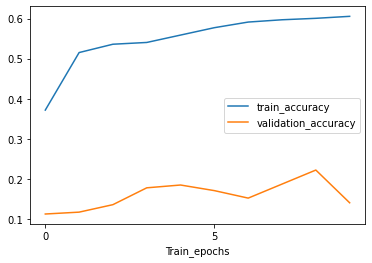

225/225 [==============================] - 0s 1ms/step


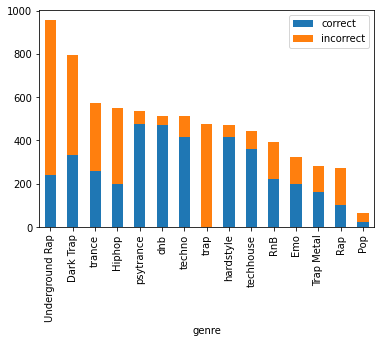

Test Accuracy: 0.54
Training Accuracy: 0.606
Validation Accuracy: 0.14


(<keras.engine.sequential.Sequential at 0x7fb2a61157f0>,
 array([10,  9,  7, ..., 13,  0,  4]))

In [ ]:
nn_cols = numeric_cols_std + categorical_cols

train_and_evaluate( X_train = df_bal_us_scaled_train[nn_cols]
                   , y_train = df_bal_us_scaled_train[target_col_encoded]
                   , X_test = df_scaled_test[nn_cols]
                   , y_test = df_scaled_test[target_col_encoded]
                   , hidden_layer_sizes = [32]
                   , activation = 'tanh'
                   , optimizer = 'Adam'
                   , learning_rate = 0.01
                   , num_epochs=10)

#### NN7-11: Unbalanced Dataset, Standardization, Different Hyperparameters

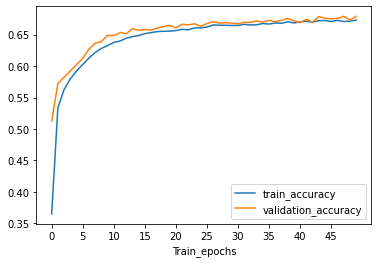

225/225 [==============================] - 0s 1ms/step


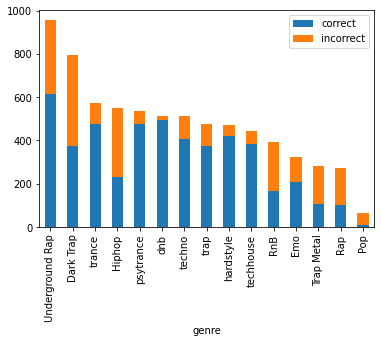

Test Accuracy: 0.675
Training Accuracy: 0.673
Validation Accuracy: 0.679


(<keras.engine.sequential.Sequential at 0x7fb29b1af310>,
 array([10, 14,  7, ..., 13,  0,  4]))

In [ ]:
nn_cols = numeric_cols_std + categorical_cols

train_and_evaluate( X_train = df_scaled_train[nn_cols]
                   , y_train = df_scaled_train[target_col_encoded]
                   , X_test = df_scaled_test[nn_cols]
                   , y_test = df_scaled_test[target_col_encoded]
                   , hidden_layer_sizes = [32]
                   , activation = 'tanh'
                   , optimizer = 'Adam'
                   , learning_rate = 0.001
                   , num_epochs=50)

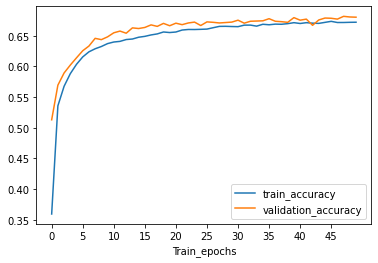

225/225 [==============================] - 0s 1ms/step


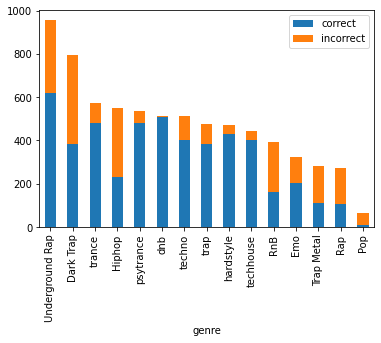

Test Accuracy: 0.684
Training Accuracy: 0.672
Validation Accuracy: 0.68


(<keras.engine.sequential.Sequential at 0x7fb29afee460>,
 array([10, 14,  7, ..., 13,  0,  4]))

In [ ]:
nn_cols = numeric_cols_std + categorical_cols

train_and_evaluate( X_train = df_scaled_train[nn_cols]
                   , y_train = df_scaled_train[target_col_encoded]
                   , X_test = df_scaled_test[nn_cols]
                   , y_test = df_scaled_test[target_col_encoded]
                   , hidden_layer_sizes = [32]
                   , activation = 'relu'
                   , optimizer = 'Adam'
                   , learning_rate = 0.001
                   , num_epochs=50)

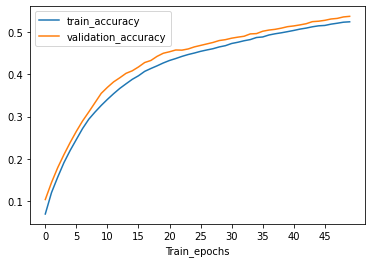

225/225 [==============================] - 0s 1ms/step


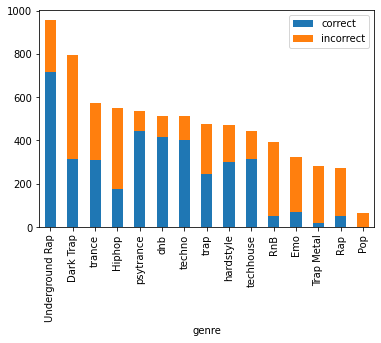

Test Accuracy: 0.533
Training Accuracy: 0.523
Validation Accuracy: 0.536


(<keras.engine.sequential.Sequential at 0x7fb2a5af48e0>,
 array([10,  9,  7, ..., 13,  0,  4]))

In [ ]:
nn_cols = numeric_cols_std + categorical_cols

train_and_evaluate( X_train = df_scaled_train[nn_cols]
                   , y_train = df_scaled_train[target_col_encoded]
                   , X_test = df_scaled_test[nn_cols]
                   , y_test = df_scaled_test[target_col_encoded]
                   , hidden_layer_sizes = [32]
                   , activation = 'tanh'
                   , optimizer = 'SGD'
                   , learning_rate = 0.001
                   , num_epochs=50)

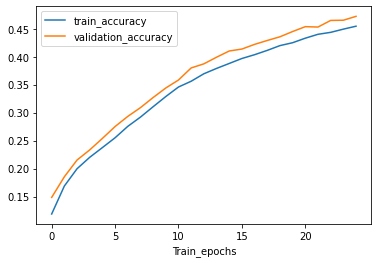

225/225 [==============================] - 1s 2ms/step


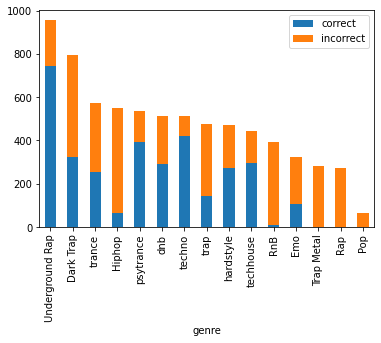

Test Accuracy: 0.463
Training Accuracy: 0.455
Validation Accuracy: 0.472


(<keras.engine.sequential.Sequential at 0x7fb29d790700>,
 array([12,  9,  7, ...,  9,  0,  7]))

In [ ]:
nn_cols = numeric_cols_std + categorical_cols

train_and_evaluate( X_train = df_scaled_train[nn_cols]
                   , y_train = df_scaled_train[target_col_encoded]
                   , X_test = df_scaled_test[nn_cols]
                   , y_test = df_scaled_test[target_col_encoded]
                   , hidden_layer_sizes = [32]
                   , activation = 'relu'
                   , optimizer = 'SGD'
                   , learning_rate = 0.001
                   , num_epochs=25)

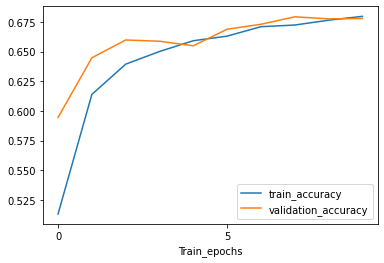

225/225 [==============================] - 0s 1ms/step


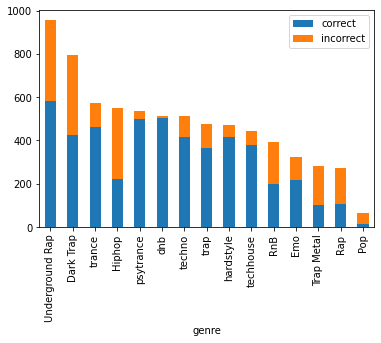

Test Accuracy: 0.684
Training Accuracy: 0.68
Validation Accuracy: 0.678


In [ ]:
nn_cols = numeric_cols_std + categorical_cols

model, predictions = train_and_evaluate( X_train = df_scaled_train[nn_cols]
                   , y_train = df_scaled_train[target_col_encoded]
                   , X_test = df_scaled_test[nn_cols]
                   , y_test = df_scaled_test[target_col_encoded]
                   , hidden_layer_sizes = [128, 128]
                   , activation = 'relu'
                   , optimizer = 'Adam'
                   , learning_rate = 0.001
                   , num_epochs=10)

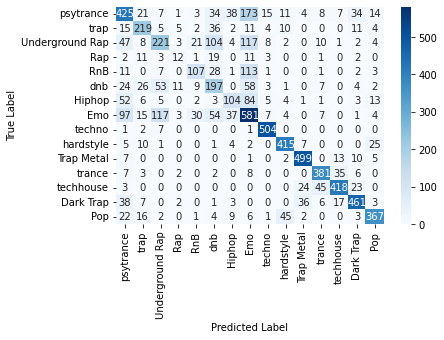

In [ ]:
plot_cm(df_scaled_test[target_col_encoded], predictions, df_scaled_test['genre'].unique())